In [1]:
%run moon_code

In [2]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
#raw_data = load_raw_data('raw_data_20180824.pickle')
kospi200, name_dict, code_dict = load_code_name_data("./data/data.csv", True)
party_df = load_party_data('party_df.csv')

In [ ]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
raw_data = {}
for code in code_dict.keys():
     raw_data[code_dict[code]] = \
        pdr.get_data_yahoo("{}.KS".format(code), start="2010-01-01", end="2018-10-01")

In [ ]:
with open('raw_data_20181008.pickle', 'wb') as handle:
    pickle.dump(raw_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [75]:
with open('raw_data_20181008.pickle', 'rb') as handle:
    raw_data = pickle.load(handle)

In [76]:
raw_data['삼성전자'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,5.953252,11950800
2010-01-05,16520.0,16580.0,16300.0,16440.0,6.048919,27925850
2010-01-06,16580.0,16820.0,16520.0,16820.0,6.188735,22948850
2010-01-07,16820.0,16820.0,16260.0,16260.0,5.982689,22107950
2010-01-08,16400.0,16420.0,16120.0,16420.0,6.041558,14777550


In [77]:
import datetime

In [ ]:
from collections import defaultdict
check_li = defaultdict(int)
for key in data.keys():
    for i in list(map(lambda x: str(x)[:10], data[key][data[key].Volume==0].Date.values)):
        check_li[i] += 1
check_ = defaultdict(list)
for key in data.keys():
    for i in list(map(lambda x: str(x)[:10], data[key][data[key].Volume==0].Date.values)):
        check_[i].append(key)
merge_li = []
for i in check_.values():
    merge_li.extend(i)
res = {}
for i in merge_li:
    try:
        res[i] += 1
    except:
        res[i] = 1
result = {}
for key, value in res.items():
    if value > 16:
        result[key] = value

In [ ]:
del_li = [key for key, df in raw_data.items() if len(df) < 252*2]
for code in del_li+list(result.keys()):
    del raw_data[code]

In [78]:
len(raw_data)

202

In [79]:
stock_li = ['현대차', '삼성물산', 'SK텔레콤', 'LG화학', '셀트리온', 'KB금융', '삼성전자', 'SK하이닉스', 'NAVER', '현대글로비스', '현대건설', '삼성중공업', 'POSCO']

In [80]:
key_li = list(raw_data.keys())
for i in key_li:
    if i not in stock_li:
        del raw_data[i]

In [81]:
raw_data.keys()

dict_keys(['KB금융', 'LG화학', 'NAVER', 'POSCO', 'SK텔레콤', 'SK하이닉스', '삼성물산', '삼성전자', '삼성중공업', '셀트리온', '현대건설', '현대글로비스', '현대차'])

In [ ]:
data = {}
for key, df in raw_data.items():
    a = df.copy()
    a['Date'] = pd.to_datetime(a.index)
    a.index = range(len(a))
    a['stockName'] = name_dict[key]
    a['stockCode'] = key
    a = a[['stockName','stockCode','Date','Close','Open','High','Low','Volume']]
    data[key] = a
del a

In [ ]:
for key, df in data.items():
    data[key] = df.drop(np.where(df.Volume==0)[0], axis=0)

In [ ]:
ks11 = pdr.get_data_yahoo("^KS11", start="2010-01-01", end="2018-10-01")
with open('ks11_20181008.pickle', 'wb') as handle:
    pickle.dump(ks11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [82]:
with open('ks11_20181008.pickle', 'rb') as handle:
    ks11 = pickle.load(handle)

In [83]:
ks11.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1681.709961,1696.140015,1681.709961,1696.140015,1696.140015,295600
2010-01-05,1701.619995,1702.390015,1686.449951,1690.619995,1690.619995,407600
2010-01-06,1697.880005,1706.890015,1696.099976,1705.319946,1705.319946,425400
2010-01-07,1702.920044,1707.900024,1683.449951,1683.449951,1683.449951,461600
2010-01-08,1694.060059,1695.260010,1668.839966,1695.260010,1695.260010,379200


Text(0,0.5,'frequency')

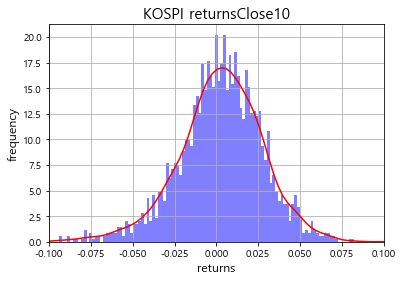

In [84]:
import seaborn as sns
sns.distplot(np.log(ks11.Open / ks11.Close.shift(10)).fillna(0),bins=200,
             hist_kws=dict(alpha=0.5, color='Blue'), color='Red')
plt.xlim([-0.1, 0.1])
plt.grid(True)
plt.title('KOSPI returnsClose10', fontsize=15)
plt.xlabel('returns', size=12)
plt.ylabel('frequency', size=12)

In [85]:
ks11['returnsClosePrevRaw1'] = np.log(ks11.Open / ks11.Close.shift(1))
ks11['returnsClosePrevRaw10'] = np.log(ks11.Open / ks11.Close.shift(10))
ks11['returnsOpenPrevRaw1'] = np.log(ks11.Open / ks11.Open.shift(1))
ks11['returnsOpenPrevRaw10'] = np.log(ks11.Open / ks11.Open.shift(10))

In [86]:
kospi_index_del = ks11[ks11.Volume == 0][ks11.columns[:6]].index
kospi_index_del

DatetimeIndex(['2014-01-20', '2014-03-19', '2014-04-14', '2014-11-27',
               '2014-12-03', '2014-12-09', '2014-12-15', '2014-12-18',
               '2016-03-25', '2016-12-26', '2017-04-14', '2017-11-23'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [87]:
del raw_data['삼성물산']

In [88]:
for key, df in raw_data.items():
    raw_data[key] = df.drop(ks11[ks11.Volume == 0][ks11.columns[:6]].index, axis=0)

In [89]:
for stock in raw_data.keys():
    print(stock)
    print(raw_data[stock][raw_data[stock].Volume == 0])

KB금융
               Open     High      Low    Close     Adj Close  Volume
Date                                                                
2015-08-14  36400.0  36400.0  36400.0  36400.0  33296.531250       0
2017-09-26  55400.0  55400.0  55400.0  55400.0  53732.789063       0
LG화학
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2015-08-14  225500.0  225500.0  225500.0  225500.0   225500.0       0
2017-09-26  379500.0  379500.0  379500.0  379500.0   379500.0       0
NAVER
                Open      High       Low     Close     Adj Close  Volume
Date                                                                    
2013-07-30  525260.0  525260.0  525260.0  525260.0  521631.96875       0
2013-07-31  525260.0  525260.0  525260.0  525260.0  521631.96875       0
2013-08-01  359750.0  359750.0  359750.0  359750.0  357265.15625       0
2013-08-02  359750.0  359750.0  359750.0  359750.0  357265.1562

In [90]:
for key, df in raw_data.items():
    raw_data[key] = df.drop(df.index[np.where(df.Volume==0)[0]], axis=0)

In [91]:
res = 0
for stock in raw_data.keys():
    res += sum(raw_data[stock].Volume == 0)
res

0

In [92]:
len(raw_data)

12

In [108]:
for key, df in raw_data.items():
    df["pct_change"] = df.Close.pct_change()
    for i in range(3, 31):
        df["close_ma_{}".format(i)] = df.Close.rolling(window = i).mean()
        df["volume_ma_{}".format(i)] = df.Volume.rolling(window = i).mean()
    for i in [7, 21, 30, 60, 90, 91, 100, 120]:
        df["his_vol_{}".format(i)] = df["pct_change"].rolling(window = i).std()*(252**0.5)
    df['returnsClosePrevRaw1'] = np.log(df.Open / df.Close.shift(1))
    df['returnsClosePrevRaw10'] = np.log(df.Open / df.Close.shift(10))
    df['returnsOpenPrevRaw1'] = np.log(df.Open / df.Open.shift(1))
    df['returnsOpenPrevRaw10'] = np.log(df.Open / df.Open.shift(10))
    df['returnsClosePrevMktres1'] = df['returnsClosePrevRaw1'] - ks11['returnsClosePrevRaw1']
    df['returnsClosePrevMktres10'] = df['returnsClosePrevRaw10'] - ks11['returnsClosePrevRaw10']
    df['returnsOpenPrevMktres1'] = df['returnsOpenPrevRaw1'] - ks11['returnsOpenPrevRaw1']
    df['returnsOpenPrevMktres10'] = df['returnsOpenPrevRaw10'] - ks11['returnsOpenPrevRaw10']
    
    df['Y1'] = np.where(df.Close - df.Close.shift(1).rolling(7).mean()>=0,1,0)
    df['Y2'] = np.where(df['pct_change'] - df['pct_change'].shift(1).rolling(7).mean()>=0,1,0)
    df['Y3'] = np.where(df.Close.rolling(7).mean() - df.Close.shift(1).rolling(7).mean()>=0,1,0)
    df['returnsOpenNextMktres10'] = df['returnsOpenPrevMktres10']
    df['Y'] = np.where(df['returnsOpenNextMktres10']>=0,1,0)

In [109]:
for key, df in raw_data.items():
    print(key, '  \t', df.shape)

KB금융   	 (2144, 84)
LG화학   	 (2144, 84)
NAVER   	 (2123, 84)
POSCO   	 (2144, 84)
SK텔레콤   	 (2144, 84)
SK하이닉스   	 (2144, 84)
삼성전자   	 (2141, 84)
삼성중공업   	 (2144, 84)
셀트리온   	 (2130, 84)
현대건설   	 (2144, 84)
현대글로비스   	 (2144, 84)
현대차   	 (2144, 84)


In [110]:
raw_data['KB금융'].head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_4,...,returnsOpenPrevRaw10,returnsClosePrevMktres1,returnsClosePrevMktres10,returnsOpenPrevMktres1,returnsOpenPrevMktres10,Y1,Y3,returnsOpenNextMktres10,Y,Y2
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,59700.0,60100.0,58500.0,59400.0,50653.644531,1197481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0
2010-01-05,59100.0,59300.0,58200.0,58700.0,50056.714844,2279425,-0.011785,NaN,NaN,NaN,...,NaN,-0.008289,NaN,-0.021871,NaN,0,0,NaN,0,0
2010-01-06,58300.0,59300.0,58300.0,58500.0,49886.164063,1686301,-0.003407,58866.666667,1.721069e+06,NaN,...,NaN,-0.011123,NaN,-0.011429,NaN,0,0,NaN,0,0
2010-01-07,58600.0,58900.0,57500.0,57800.0,49289.234375,1378161,-0.011966,58333.333333,1.781296e+06,58600.0,...,NaN,0.003116,NaN,0.002169,NaN,0,0,NaN,0,0
2010-01-08,58000.0,58400.0,57300.0,57900.0,49374.511719,1218206,0.001730,58066.666667,1.427556e+06,58225.0,...,NaN,-0.002829,NaN,-0.005075,NaN,0,0,NaN,0,0


In [111]:
len(raw_data['KB금융'].columns)

84

# Feature window 조정

In [112]:
target_li = ['Y1','Y2','Y3','returnsOpenNextMktres10','Y']

In [116]:
for stock in raw_data.keys():
    raw_data[stock]['Y1'] = raw_data[stock]['Y1'].shift(-5)
    raw_data[stock]['Y2'] = raw_data[stock]['Y2'].shift(-5)
    raw_data[stock]['Y3'] = raw_data[stock]['Y3'].shift(-1)
    raw_data[stock]['returnsOpenNextMktres10'] = \
            raw_data[stock]['returnsOpenNextMktres10'].shift(-10)
    raw_data[stock]['Y'] = raw_data[stock]['Y'].shift(-10)

In [117]:
data = adjust_window(raw_data, '2013-07-01', '2018-07-01')

In [121]:
res = 0
for stock in data.keys():
    res += data[stock].isnull().sum().sum()
res

0

In [122]:
data['삼성전자'].head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_4,...,returnsOpenPrevRaw10,returnsClosePrevMktres1,returnsClosePrevMktres10,returnsOpenPrevMktres1,returnsOpenPrevMktres10,Y1,Y3,returnsOpenNextMktres10,Y,Y2
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,26680.0,26920.0,26440.0,26520.0,36.487026,12825950,-0.011923,26713.333333,1.984778e+07,26340.0,...,-0.026629,0.000347,-0.006819,-0.015694,-0.006377,0.0,1.0,-0.024389,0.0,0.0
2013-07-02,26800.0,27040.0,26600.0,26700.0,36.734673,10214450,0.006787,26686.666667,1.466722e+07,26710.0,...,-0.020680,0.007527,-0.013547,-0.000732,-0.006564,0.0,0.0,-0.024192,0.0,1.0
2013-07-03,26680.0,26780.0,25900.0,26020.0,35.799110,12822050,-0.025468,26413.333333,1.195415e+07,26520.0,...,-0.035350,-0.000356,-0.007718,-0.000736,-0.011261,0.0,1.0,-0.034175,0.0,1.0
2013-07-04,26040.0,26340.0,25920.0,26340.0,36.239376,9042650,0.012298,26353.333333,1.069305e+07,26395.0,...,-0.031004,-0.002422,-0.009658,-0.011362,-0.012665,1.0,1.0,-0.010809,0.0,1.0
2013-07-05,25720.0,26300.0,25200.0,25340.0,34.863544,30382800,-0.037965,25900.000000,1.741583e+07,26100.0,...,-0.006202,-0.029150,-0.044114,-0.022410,-0.029494,1.0,0.0,-0.015323,0.0,1.0


In [123]:
data['삼성전자'].tail()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_4,...,returnsOpenPrevRaw10,returnsClosePrevMktres1,returnsClosePrevMktres10,returnsOpenPrevMktres1,returnsOpenPrevMktres10,Y1,Y3,returnsOpenNextMktres10,Y,Y2
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-25,47050.0,47050.0,46150.0,46650.0,46305.597656,10587711,-0.012698,46983.333333,1.030042e+07,46987.5,...,-0.064804,-0.001978,-0.012274,-0.011262,-0.016664,0.0,0.0,-0.001103,0.0,0.0
2018-06-26,45900.0,47300.0,45900.0,47000.0,46653.011719,11223166,0.007503,46966.666667,1.070296e+07,46987.5,...,-0.080545,-0.006350,-0.027182,-0.017431,-0.030629,0.0,1.0,0.021906,1.0,1.0
2018-06-27,47450.0,48500.0,47000.0,47950.0,47596.000000,15274752,0.020213,47200.000000,1.236188e+07,47212.5,...,-0.046328,0.010184,0.009319,0.026965,0.005672,0.0,0.0,0.008819,1.0,1.0
2018-06-28,46850.0,47150.0,46600.0,46800.0,46800.000000,12784800,-0.023983,47250.000000,1.309424e+07,47100.0,...,-0.044869,-0.016929,0.012058,-0.003313,0.006831,0.0,0.0,-0.002520,0.0,0.0
2018-06-29,46250.0,47150.0,46200.0,46650.0,46650.000000,14099635,-0.003205,47133.333333,1.405306e+07,47100.0,...,-0.047502,-0.016753,0.003317,-0.012163,-0.002727,0.0,0.0,0.004344,1.0,0.0


In [139]:
X_li = [i for i in data['삼성전자'].columns if i not in target_li]
scl_X_li = ['scl_'+i for i in X_li]

In [141]:
for key, df in data.items():
    for X in X_li:
        df['scl_{}'.format(X)] = df[X]

# Train, Test 분리

In [144]:
train, test = multi_train_test_split(data, 0.8, dtrain=True)

In [145]:
train['삼성전자'].head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_4,...,scl_his_vol_100,scl_his_vol_120,scl_returnsClosePrevRaw1,scl_returnsClosePrevRaw10,scl_returnsOpenPrevRaw1,scl_returnsOpenPrevRaw10,scl_returnsClosePrevMktres1,scl_returnsClosePrevMktres10,scl_returnsOpenPrevMktres1,scl_returnsOpenPrevMktres10
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,26680.0,26920.0,26440.0,26520.0,36.487026,12825950,-0.011923,26713.333333,1.984778e+07,26340.0,...,0.248252,0.250910,-0.005979,-0.023705,-0.011923,-0.026629,0.000347,-0.006819,-0.015694,-0.006377
2013-07-02,26800.0,27040.0,26600.0,26700.0,36.734673,10214450,0.006787,26686.666667,1.466722e+07,26710.0,...,0.248532,0.250530,0.010503,-0.034474,0.004488,-0.020680,0.007527,-0.013547,-0.000732,-0.006564
2013-07-03,26680.0,26780.0,25900.0,26020.0,35.799110,12822050,-0.025468,26413.333333,1.195415e+07,26520.0,...,0.251533,0.253053,-0.000749,-0.025899,-0.004488,-0.035350,-0.000356,-0.007718,-0.000736,-0.011261
2013-07-04,26040.0,26340.0,25920.0,26340.0,36.239376,9042650,0.012298,26353.333333,1.069305e+07,26395.0,...,0.252300,0.251939,0.000768,-0.020525,-0.024280,-0.031004,-0.002422,-0.009658,-0.011362,-0.012665
2013-07-05,25720.0,26300.0,25200.0,25340.0,34.863544,30382800,-0.037965,25900.000000,1.741583e+07,26100.0,...,0.254491,0.257487,-0.023820,-0.029876,-0.012365,-0.006202,-0.029150,-0.044114,-0.022410,-0.029494


In [146]:
train['삼성전자'].tail()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_4,...,scl_his_vol_100,scl_his_vol_120,scl_returnsClosePrevRaw1,scl_returnsClosePrevRaw10,scl_returnsOpenPrevRaw1,scl_returnsOpenPrevRaw10,scl_returnsClosePrevMktres1,scl_returnsClosePrevMktres10,scl_returnsOpenPrevMktres1,scl_returnsOpenPrevMktres10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-14,45800.0,46060.0,45240.0,45360.0,11711.661133,10166700,-0.000881,45380.0,9.915300e+06,45560.0,...,0.219317,0.216763,0.008772,0.025654,0.014515,0.006132,0.004637,0.008370,0.003713,-0.005679
2017-06-15,45680.0,45920.0,45180.0,45680.0,11794.284180,9657000,0.007055,45480.0,9.482867e+06,45455.0,...,0.211649,0.216799,0.007030,0.021687,-0.002624,0.024375,0.006726,0.010680,0.002076,0.009899
2017-06-16,45500.0,45940.0,45460.0,45580.0,11768.463867,17403450,-0.002189,45540.0,1.240905e+07,45505.0,...,0.208411,0.216148,-0.003948,0.018186,-0.003948,0.014166,-0.005027,0.009866,-0.000081,0.007422
2017-06-19,45580.0,46560.0,45560.0,46560.0,12021.494141,11303900,0.021501,45940.0,1.278812e+07,45795.0,...,0.210436,0.216534,0.000000,-0.008302,0.001757,0.011474,-0.000927,-0.005051,0.001833,0.007129
2017-06-20,47240.0,48140.0,47220.0,48140.0,12429.440430,15045000,0.033935,46760.0,1.458412e+07,46490.0,...,0.216246,0.221333,0.014499,0.027905,0.035772,0.025730,0.009602,0.022045,0.027968,0.023259


In [147]:
test['삼성전자'].head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_4,...,scl_his_vol_100,scl_his_vol_120,scl_returnsClosePrevRaw1,scl_returnsClosePrevRaw10,scl_returnsOpenPrevRaw1,scl_returnsOpenPrevRaw10,scl_returnsClosePrevMktres1,scl_returnsClosePrevMktres10,scl_returnsOpenPrevMktres1,scl_returnsOpenPrevMktres10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-21,47740.0,48120.0,47480.0,47480.0,12259.031250,9973650,-0.013710,47393.333333,1.210752e+07,46940.0,...,0.216961,0.222344,-0.008344,0.052463,0.010529,0.026317,-0.003690,0.053272,0.020784,0.029167
2017-06-22,47960.0,48080.0,47720.0,47960.0,12382.965820,11455800,0.010110,47860.000000,1.215815e+07,47535.0,...,0.216708,0.222439,0.010059,0.060156,0.004598,0.063705,0.007225,0.059881,0.002061,0.062613
2017-06-23,47600.0,47780.0,47420.0,47620.0,12295.179688,9515100,-0.007089,47686.666667,1.031485e+07,47800.0,...,0.214737,0.222869,-0.007535,0.032020,-0.007535,0.041172,-0.008028,0.036291,-0.010626,0.041037
2017-06-26,47520.0,48360.0,47520.0,48280.0,12465.586914,8552800,0.013860,47953.333333,9.841233e+06,47835.0,...,0.215515,0.222036,-0.002102,0.046079,-0.001682,0.045198,-0.003148,0.036280,-0.005701,0.040821
2017-06-27,48220.0,48400.0,47900.0,48300.0,12470.751953,9616750,0.000414,48066.666667,9.228217e+06,48040.0,...,0.210077,0.221828,-0.001244,0.060262,0.014623,0.066005,-0.000448,0.055196,0.012245,0.054272


In [148]:
test['삼성전자'].tail()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_4,...,scl_his_vol_100,scl_his_vol_120,scl_returnsClosePrevRaw1,scl_returnsClosePrevRaw10,scl_returnsOpenPrevRaw1,scl_returnsOpenPrevRaw10,scl_returnsClosePrevMktres1,scl_returnsClosePrevMktres10,scl_returnsOpenPrevMktres1,scl_returnsOpenPrevMktres10
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-25,47050.0,47050.0,46150.0,46650.0,46305.597656,10587711,-0.012698,46983.333333,1.030042e+07,46987.5,...,0.299864,0.305756,-0.004242,-0.053788,0.001063,-0.064804,-0.001978,-0.012274,-0.011262,-0.016664
2018-06-26,45900.0,47300.0,45900.0,47000.0,46653.011719,11223166,0.007503,46966.666667,1.070296e+07,46987.5,...,0.298121,0.305782,-0.016208,-0.083556,-0.024746,-0.080545,-0.006350,-0.027182,-0.017431,-0.030629
2018-06-27,47450.0,48500.0,47000.0,47950.0,47596.000000,15274752,0.020213,47200.000000,1.236188e+07,47212.5,...,0.298313,0.299650,0.009529,-0.040274,0.033211,-0.046328,0.010184,0.009319,0.026965,0.005672
2018-06-28,46850.0,47150.0,46600.0,46800.0,46800.000000,12784800,-0.023983,47250.000000,1.309424e+07,47100.0,...,0.300650,0.301176,-0.023208,-0.028408,-0.012726,-0.044869,-0.016929,0.012058,-0.003313,0.006831
2018-06-29,46250.0,47150.0,46200.0,46650.0,46650.000000,14099635,-0.003205,47133.333333,1.405306e+07,47100.0,...,0.299133,0.298033,-0.011822,-0.029821,-0.012890,-0.047502,-0.016753,0.003317,-0.012163,-0.002727


# Standard Scaler

In [149]:
multi_apply_standard_scale(train, test, scl_X_li)

In [157]:
train['KB금융'][['pct_change','scl_pct_change','his_vol_7','scl_his_vol_7']].head()

,pct_change,scl_pct_change,his_vol_7,scl_his_vol_7
Date,,,,
2013-07-01,-0.010234,-0.685730,0.166851,-0.866216
2013-07-02,-0.001477,-0.133083,0.137068,-1.220829
2013-07-03,-0.029586,-1.907035,0.210235,-0.349650
2013-07-04,-0.006098,-0.424682,0.207253,-0.385158
2013-07-05,0.012270,0.734498,0.230179,-0.112174


In [158]:
store = (train, test, X_li, scl_X_li, target_li)

In [160]:
with open('학습준비파일_20181013.pickle', 'wb') as handle:
    pickle.dump(store, handle, protocol=pickle.HIGHEST_PROTOCOL)